In [1]:
%pip install pillow
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!cp leniwce_run2/photos/photo_009.jpg test.jpg

# Open CV GPU speed up

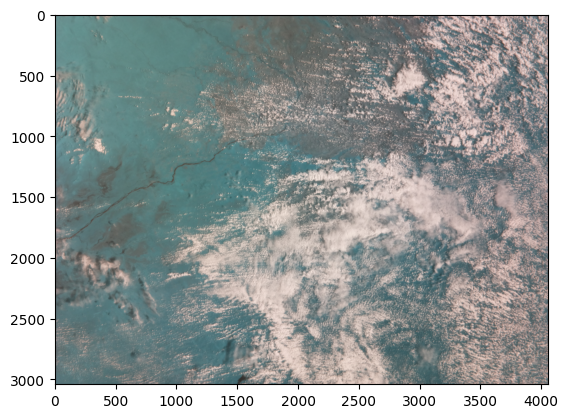

In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [4]:
def detect_night(im):
    in_min = np.percentile(im, 10) # Adjust percentile for better detection
    in_max = np.percentile(im, 90)

    if in_min == in_max:
        return True

    return False

In [5]:
def generate_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # H: 85 - 125
    # S: 100 - 255

    lower_blue = np.array([85, 0, 0])
    upper_blue = np.array([125, 255, 255])

    water_mask = np.logical_not(cv2.inRange(hsv, lower_blue, upper_blue))

    sensitivity = 70
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])

    cloud_mask = cv2.inRange(hsv, lower_white, upper_white)

    return np.logical_not(np.logical_or(water_mask, cloud_mask))

(3040, 4056)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


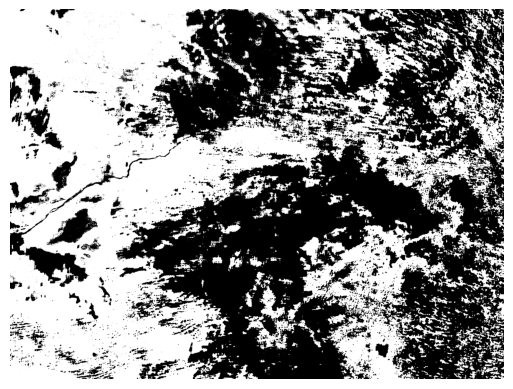

In [10]:
image = cv2.imread("test.jpg")

mask = generate_mask(image)

print(mask.shape)
print(mask)

plt.axis('off')
plt.imshow(mask, cmap="gray")

In [8]:
from tqdm import tqdm
import os, os.path

imgs = []
path = "./leniwce_run2/photos/"

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() != ".jpg":
        continue
    imgs.append(os.path.join(path,f))

imgs.sort()

for image_path in tqdm(imgs):
    image = cv2.imread(image_path)

    if not detect_night(image):
        mask = generate_mask(image)

        cv2.imwrite(image_path.replace("photos", "masks"), mask * 255)

100%|██████████| 255/255 [02:01<00:00,  2.10it/s]
